# ChessMatch

by Eduardo Álvarez (git: Aledgit) and Benjamín Varela (git: 212113114)



*We could not upload the data we used, because the file was very large, but it is not necessary to test with your games

First we read the pre-processed data of the professional players (the data only includes the moves made by the player) (The original data was obtained from https://www.pgnmentor.com/files.html)

In [1]:
import json

ruta_json = "GM_games.json"
with open(ruta_json) as archivo_json:
    datos = json.load(archivo_json)

In [2]:
partidas_gm = []

for k in datos.keys():
    for i in datos[k]:
        partidas_gm.append((i, k))
partidas_gm

[(['e4',
   'Nf3',
   'd3',
   'g3',
   'Bg2',
   'O-O',
   'c3',
   'a3',
   'b4',
   'Nbd2',
   'Nb3',
   'Be3',
   'Rc1',
   'Nfd2',
   'f4',
   'Qe2',
   'axb4',
   'Bxf4',
   'Rxc3',
   'Bxd6',
   'Bc5',
   'bxc5',
   'd4',
   'Qd3',
   'Nxd2',
   'Nxe4',
   'd5',
   'g4',
   'Rf7+',
   'Qf1',
   'Rxb7',
   'Kh1',
   'Qg1',
   'Re7',
   'c6',
   'Qxe3',
   'Nf6+',
   'Rxe3',
   'h4',
   'Kh2',
   'c7'],
  'Abdusattorov'),
 (['Nf6',
   'g6',
   'd5',
   'Nxd5',
   'Bg7',
   'Qxd5',
   'O-O',
   'Nc6',
   'Qd8',
   'e5',
   'Qd6',
   'Bg4',
   'Rfe8',
   'Rac8',
   'Ne7',
   'Nd5',
   'c6',
   'Qe7',
   'h6',
   'Qd7',
   'b6',
   'Be6',
   'Red8',
   'f5',
   'Ne7',
   'Kh7',
   'Rb8',
   'Ra8',
   'Rxa3',
   'Rb8',
   'Nd5',
   'cxd5',
   'Raa8',
   'Rxa8',
   'f4',
   'fxg3',
   'Bxe5',
   'Qf7',
   'Qxg6',
   'Kxg6',
   'Bxd5',
   'Bxg3',
   'Bf4',
   'Ra2',
   'Bh2',
   'Rb2',
   'Rb4',
   'Rb5',
   'h5',
   'Be5',
   'Kf5',
   'Ke4',
   'Rb2',
   'Kd5',
   'Kc4',
   'Rb3+',
  

In [8]:
import pandas as pd

df = pd.DataFrame(partidas_gm, columns=["Movimientos", "Jugador"])
df

,Movimientos,Jugador
0,"[e4, Nf3, d3, g3, Bg2, O-O, c3, a3, b4, Nbd2, ...",Abdusattorov
1,"[Nf6, g6, d5, Nxd5, Bg7, Qxd5, O-O, Nc6, Qd8, ...",Abdusattorov
2,"[e4, Nf3, Bb5, O-O, Re1, Nxe5, Bf1, Rxe5, d4, ...",Abdusattorov
3,"[Nf6, d5, g6, Nxd5, Nxc3, Bg7, c5, Nc6, cxd4, ...",Abdusattorov
4,"[c4, Nf3, Nc3, g3, Bg2, cxd5, O-O, Nxd5, d3, B...",Abdusattorov
...,...,...
472968,"[d6, g6, h5, Bg7, c5, cxd4, Nc6, Nxd4, Bxd4, N...",Zvjaginsev
472969,"[Nf3, g3, Bg2, O-O, d4, Re1, Nbd2, Bxd2, d5, Q...",Zvjaginsev
472970,"[g6, Bg7, c5, d6, e5, Bg4, Kf8, Bh6, Kg7, Na6,...",Zvjaginsev
472971,"[Nf3, g3, Bg2, h3, O-O, c4, Qb3, d3, Be3, Nc3,...",Zvjaginsev


There are many players, so we will filter to only keep the world champions and we transform the movements into a string.

In [9]:
campeones_mundiales = ["Steinitz", "Lasker", "Capablanca", "Alekhine", "Euwe", "Botvinnik", "Smyslov", "Tal", "Petrosian", "Spassky", "Fischer", "Karpov", "Kasparov", "Kramnik", "Anand", "Carlsen", "Ding"]

df = df[df["Jugador"].isin(campeones_mundiales)].copy()


df["Movimientos"] = df["Movimientos"].apply(lambda x: " ".join(x))

df

,Movimientos,Jugador
10406,e5 Bc5 d6 Bg4 Bxf3 Nc6 Bb6 Nce7 exd4 Nf6 O-O d...,Alekhine
10407,e5 Nc6 exd4 Nf6 Bb4 bxc6 Qe7 d5 O-O Bc5 gxf6 B...,Alekhine
10408,e4 Nf3 Bc4 Ng5 exd5 Bb5+ dxc6 Qf3 Bd3 Ne4 Ng3 ...,Alekhine
10409,e4 Ne2 Ng3 Nc3 Qf3 exf5 Nce4 c3 d4 Nh5 Nhf6+ g...,Alekhine
10410,e5 Nc6 Bc5 Bxb4 Ba5 exd4 dxc3 Qf6 Qg6 Nge7 Rb8...,Alekhine
...,...,...
411953,d5 c6 Nf6 e6 h6 Qxf6 a5 a4 Nd7 dxe4 Qf4 e5 exd...,Tal
411954,e4 Nf3 d4 Nxd4 Nc3 Be3 Bd3 O-O h3 Qf3 Qxe3 Nf5...,Tal
411955,e6 d5 dxe4 Nd7 Be7 Ngf6 Nxf6 c5 Qa5+ Qxc5 O-O ...,Tal
411956,Nf3 d4 c4 g3 Bg2 O-O Nc3 Ne5 cxd5 d6 dxe7 Qa4 ...,Tal


In [10]:
df["Jugador"].value_counts()

Carlsen       5662
Anand         4145
Kramnik       3878
Karpov        3516
Smyslov       2627
Tal           2431
Spassky       2231
Kasparov      2115
Ding          2011
Petrosian     1893
Alekhine      1661
Euwe          1122
Lasker         900
Botvinnik      891
Fischer        827
Capablanca     597
Steinitz       590
Name: Jugador, dtype: int64

In [11]:
df.reset_index(drop=True, inplace=True)
df

,Movimientos,Jugador
0,e5 Bc5 d6 Bg4 Bxf3 Nc6 Bb6 Nce7 exd4 Nf6 O-O d...,Alekhine
1,e5 Nc6 exd4 Nf6 Bb4 bxc6 Qe7 d5 O-O Bc5 gxf6 B...,Alekhine
2,e4 Nf3 Bc4 Ng5 exd5 Bb5+ dxc6 Qf3 Bd3 Ne4 Ng3 ...,Alekhine
3,e4 Ne2 Ng3 Nc3 Qf3 exf5 Nce4 c3 d4 Nh5 Nhf6+ g...,Alekhine
4,e5 Nc6 Bc5 Bxb4 Ba5 exd4 dxc3 Qf6 Qg6 Nge7 Rb8...,Alekhine
...,...,...
37092,d5 c6 Nf6 e6 h6 Qxf6 a5 a4 Nd7 dxe4 Qf4 e5 exd...,Tal
37093,e4 Nf3 d4 Nxd4 Nc3 Be3 Bd3 O-O h3 Qf3 Qxe3 Nf5...,Tal
37094,e6 d5 dxe4 Nd7 Be7 Ngf6 Nxf6 c5 Qa5+ Qxc5 O-O ...,Tal
37095,Nf3 d4 c4 g3 Bg2 O-O Nc3 Ne5 cxd5 d6 dxe7 Qa4 ...,Tal


We vectorize the strings that contain the moves using Sentence-BERT

In [ ]:
import sentence_transformers
def vectorizar(jugadas):
    modelo = sentence_transformers.SentenceTransformer("bert-base-nli-mean-tokens")
    return  modelo.encode(jugadas)

In [ ]:
df["Movimientos"] = df["Movimientos"].apply(vectorizar)
df

In [ ]:
#df.to_csv("movimientos_vectorizados.csv", index=False)

We save and read the data

In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv("movimientos_vectorizados.csv")
df["Movimientos"] = df["Movimientos"].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
df

,Movimientos,Jugador
0,"[0.129905656, 1.01455879, 0.373896122, 0.06524...",Alekhine
1,"[0.18280862, 0.93180174, 0.55392313, -0.088220...",Alekhine
2,"[0.0666133314, 0.886144578, 0.446246952, -0.15...",Alekhine
3,"[-0.247070238, 0.747730255, 0.7055161, -0.1055...",Alekhine
4,"[0.0970335379, 0.953312635, 0.298921138, -0.03...",Alekhine
...,...,...
37092,"[0.0792945549, 0.889419556, 0.518985033, -0.05...",Tal
37093,"[-0.282590419, 0.582363129, 0.545618176, -0.13...",Tal
37094,"[0.194788992, 1.08474302, 0.267043412, 0.00658...",Tal
37095,"[-0.10328377, 0.715310991, 0.491934329, -0.026...",Tal


In [20]:
df = pd.concat([df, df["Movimientos"].apply(pd.Series)], axis=1)
df = df.drop(columns=["Movimientos"])
df

,Jugador,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,Alekhine,0.129906,1.014559,0.373896,0.065240,0.121783,-0.299630,0.361673,-0.112090,-0.696019,...,-0.203733,-0.745709,-0.412826,-0.225623,0.330870,-1.399653,-0.219471,-0.209104,0.433068,0.629154
1,Alekhine,0.182809,0.931802,0.553923,-0.088220,0.083568,-0.254767,0.532058,-0.069527,-0.774626,...,-0.086407,-0.777177,-0.365740,-0.032048,0.368401,-1.250027,-0.268042,-0.156332,0.345662,0.441251
2,Alekhine,0.066613,0.886145,0.446247,-0.150929,0.049735,-0.350813,0.304442,-0.120138,-0.931873,...,-0.294742,-0.681480,-0.476060,-0.076723,-0.073091,-1.282926,-0.190295,-0.185135,0.670322,0.635209
3,Alekhine,-0.247070,0.747730,0.705516,-0.105515,-0.097309,-0.191384,0.466110,-0.148955,-0.681943,...,-0.253023,-0.631430,-0.077860,-0.319245,-0.135471,-1.359030,-0.211552,-0.533281,0.674921,0.763851
4,Alekhine,0.097034,0.953313,0.298921,-0.036183,0.116548,-0.274407,0.444627,-0.155595,-0.621248,...,-0.255514,-0.697601,-0.416516,-0.146807,0.424262,-1.304640,-0.029708,-0.203544,0.395210,0.454459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37092,Tal,0.079295,0.889420,0.518985,-0.058805,0.065209,-0.290682,0.285422,-0.254577,-0.561422,...,-0.276013,-0.644411,-0.436878,-0.076617,0.135800,-1.287781,-0.105523,-0.224501,0.518847,0.579188
37093,Tal,-0.282590,0.582363,0.545618,-0.134274,0.044666,-0.114713,0.477443,-0.223837,-0.658812,...,-0.250887,-0.651296,0.225534,-0.115271,-0.342485,-1.047518,-0.047623,-0.648501,0.619445,0.511120
37094,Tal,0.194789,1.084743,0.267043,0.006582,0.126420,-0.248428,0.485693,-0.191190,-0.701489,...,-0.239445,-0.744142,-0.651609,-0.115170,0.422729,-1.397665,-0.167929,-0.027462,0.357518,0.443920
37095,Tal,-0.103284,0.715311,0.491934,-0.026135,0.077040,-0.394127,0.360971,-0.089289,-0.721189,...,-0.366846,-0.772675,-0.306564,-0.135406,-0.053029,-1.228665,-0.158061,-0.203965,0.489320,0.454535


We split the data

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Jugador"])
y = df["Jugador"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
df_train = pd.DataFrame(X_train)
df_train["Jugador"] = y_train
df_train

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,Jugador
1219,-0.104997,1.104885,0.431549,-0.080855,-0.004838,-0.413981,0.572494,-0.356248,-0.745180,0.762945,...,-0.710544,-0.564002,-0.158995,-0.000492,-1.452370,-0.155819,-0.281015,0.438525,0.398958,Alekhine
28389,-0.003554,0.940787,0.006786,-0.299748,0.235598,-0.120974,0.412587,-0.157685,-0.668121,0.509591,...,-0.691236,-0.503677,0.063593,0.366441,-1.451131,-0.162407,0.017620,0.314390,0.240047,Petrosian
8634,0.384085,1.087469,0.396524,-0.025700,0.060504,-0.433231,0.411452,-0.023380,-0.965607,0.738338,...,-0.691580,-0.679298,0.124774,0.293652,-1.517493,-0.171867,-0.042062,0.587379,0.450259,Carlsen
22850,0.095506,0.698990,0.383719,0.027370,0.140353,-0.208557,0.418626,0.105780,-0.699889,0.536333,...,-0.720586,-0.337445,-0.116538,0.395645,-1.312334,-0.108262,-0.159430,0.207062,0.412702,Kramnik
19999,-0.015062,1.053245,0.182164,-0.105492,0.003730,-0.463732,0.415453,0.142127,-0.710983,0.816923,...,-0.726965,-0.672999,-0.112508,0.086052,-1.202930,0.016920,-0.256589,0.598476,0.499284,Karpov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,-0.083501,0.870695,0.292226,-0.047278,-0.109891,-0.215382,0.408834,-0.140408,-0.765392,0.767306,...,-0.640515,-0.332931,-0.085081,0.059924,-1.213562,0.046745,-0.412911,0.571930,0.550129,Fischer
6265,0.274890,1.270822,0.125722,0.102016,0.101722,-0.281042,0.406109,-0.022249,-0.669154,0.581102,...,-0.696825,-0.438866,-0.284637,0.252860,-1.306364,0.056810,-0.129646,0.472695,0.473053,Botvinnik
11284,0.103931,0.956563,0.449476,0.126566,0.082393,-0.280667,0.251013,-0.202215,-0.683861,0.494405,...,-0.723880,-0.448692,-0.353540,0.346960,-1.194475,-0.084944,-0.235324,0.454151,0.470295,Carlsen
860,-0.327736,0.462089,0.738110,-0.089582,-0.268598,-0.067193,0.761813,-0.347403,-0.852416,0.651943,...,-0.606492,0.040654,-0.197532,-0.331332,-1.033309,-0.285865,-0.418663,0.468421,0.408518,Alekhine


In [5]:
df_train["Jugador"].value_counts()

Carlsen       4534
Anand         3298
Kramnik       3113
Karpov        2814
Smyslov       2097
Tal           1922
Spassky       1792
Kasparov      1692
Ding          1590
Petrosian     1533
Alekhine      1321
Euwe           915
Lasker         724
Botvinnik      697
Fischer        692
Capablanca     482
Steinitz       461
Name: Jugador, dtype: int64

We clearly see that the training dataset is unbalanced

In [6]:
import numpy as np
X_train = df_train.drop(columns=["Jugador"]).to_numpy()
y_train = df_train["Jugador"].to_numpy()


In [8]:
X_train.shape

(29677, 768)

So we do oversampling with SMOTE

In [9]:
from imblearn.over_sampling import SMOTE

X_train = np.array([np.array(xi, dtype=np.float32) for xi in X_train])
smote = SMOTE(sampling_strategy="not majority", random_state=42)


X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [10]:
X_train_resampled.shape

(77078, 768)

In [11]:
np.unique(y_train_resampled, return_counts=True)

(array(['Alekhine', 'Anand', 'Botvinnik', 'Capablanca', 'Carlsen', 'Ding',
        'Euwe', 'Fischer', 'Karpov', 'Kasparov', 'Kramnik', 'Lasker',
        'Petrosian', 'Smyslov', 'Spassky', 'Steinitz', 'Tal'], dtype=object),
 array([4534, 4534, 4534, 4534, 4534, 4534, 4534, 4534, 4534, 4534, 4534,
        4534, 4534, 4534, 4534, 4534, 4534], dtype=int64))

We split the train dataset, because we are going to "train" 2 "models"

In [12]:
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

modelo = SVC()
modelo.fit(X_train_1, y_train_1)

y_pred = modelo.predict(X_train_2)

print(accuracy_score(y_train_2, y_pred))
print(classification_report(y_train_2, y_pred))

0.18870005189413597
              precision    recall  f1-score   support

    Alekhine       0.15      0.19      0.17       896
       Anand       0.19      0.11      0.14       887
   Botvinnik       0.17      0.20      0.19       884
  Capablanca       0.24      0.26      0.25       957
     Carlsen       0.13      0.10      0.11       921
        Ding       0.13      0.27      0.17       894
        Euwe       0.18      0.19      0.18       885
     Fischer       0.20      0.31      0.24       891
      Karpov       0.15      0.11      0.13       904
    Kasparov       0.15      0.11      0.13       934
     Kramnik       0.14      0.03      0.06       899
      Lasker       0.21      0.27      0.24       922
   Petrosian       0.23      0.25      0.24       900
     Smyslov       0.16      0.06      0.09       907
     Spassky       0.24      0.17      0.20       927
    Steinitz       0.30      0.49      0.37       928
         Tal       0.11      0.06      0.07       880

    ac

Quite low accuracy, but 3 times better than chance, but this is just a part of the model.

Let's see the confusion matrix

In [44]:
import itertools, matplotlib.pyplot as plt, numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


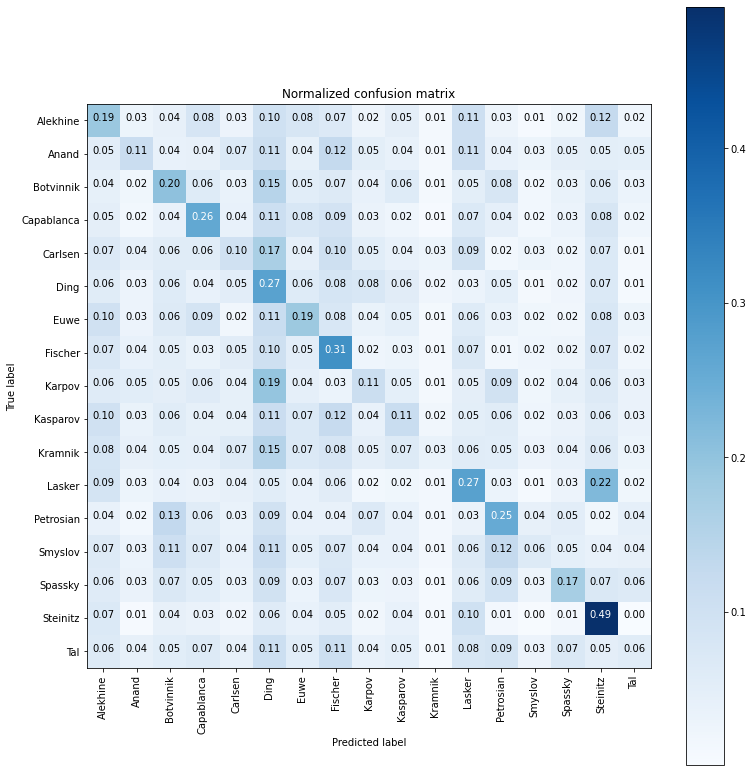

In [15]:
from sklearn.metrics import confusion_matrix
labels = y.unique()


cnf_matrix = confusion_matrix(y_train_2, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(11, 11))
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True, title='Normalized confusion matrix')

plt.show()

Since in chess there is no single style for each player, it is logical that a player's style is composed of percentages of other styles.

So we will take the vectors of the confusion matrix as the vector representation of the players, assuming for example that Lasker has a 22% Steinitz style.

In [16]:
matriz_normalizada = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

vectores_jugadores = {}

for vector, jugador in zip(matriz_normalizada, labels):
    vectores_jugadores[jugador] = vector
    

In [17]:
vectores_jugadores

{'Alekhine': array([0.19, 0.03, 0.04, 0.08, 0.03, 0.1 , 0.08, 0.07, 0.02, 0.05, 0.01,
        0.11, 0.03, 0.01, 0.02, 0.12, 0.02]),
 'Anand': array([0.05, 0.11, 0.04, 0.04, 0.07, 0.11, 0.04, 0.12, 0.05, 0.04, 0.01,
        0.11, 0.04, 0.03, 0.05, 0.05, 0.05]),
 'Botvinnik': array([0.04, 0.02, 0.2 , 0.06, 0.03, 0.15, 0.05, 0.07, 0.04, 0.06, 0.01,
        0.05, 0.08, 0.02, 0.03, 0.06, 0.03]),
 'Capablanca': array([0.05, 0.02, 0.04, 0.26, 0.04, 0.11, 0.08, 0.09, 0.03, 0.02, 0.01,
        0.07, 0.04, 0.02, 0.03, 0.08, 0.02]),
 'Carlsen': array([0.07, 0.04, 0.06, 0.06, 0.1 , 0.17, 0.04, 0.1 , 0.05, 0.04, 0.03,
        0.09, 0.02, 0.03, 0.02, 0.07, 0.01]),
 'Ding': array([0.06, 0.03, 0.06, 0.04, 0.05, 0.27, 0.06, 0.08, 0.08, 0.06, 0.02,
        0.03, 0.05, 0.01, 0.02, 0.07, 0.01]),
 'Euwe': array([0.1 , 0.03, 0.06, 0.09, 0.02, 0.11, 0.19, 0.08, 0.04, 0.05, 0.01,
        0.06, 0.03, 0.02, 0.02, 0.08, 0.03]),
 'Fischer': array([0.07, 0.04, 0.05, 0.03, 0.05, 0.1 , 0.05, 0.31, 0.02, 0.03, 0.01,


We save the vectors and the model

In [18]:
#import pickle

#with open('svm_model_chess.pkl', 'wb') as file:
#    pickle.dump(modelo, file)
#
#with open('vectores_jugadores.pkl', 'wb') as file:
#    pickle.dump(vectores_jugadores, file)

We create the functions to read pgn files, create the user vector and compare the vectors.

In [ ]:
import sentence_transformers
import chess.pgn

def parse_pgn_file(file_path, player):
    
    with open(file_path, 'r', encoding='utf-8') as pgn:
        
        player_games = list()

        while True:

            try:
                game = chess.pgn.read_game(pgn)
            except UnicodeDecodeError:
                print(game)
                
            if game is None:
                break  
            #We asume that name of the player is always in one of the headers
            player_color = "White" if player == game.headers["White"] else "Black"
            player_moves = list()
            node = game

            i = 0
            while not node.is_end():

                move = node.variation(0)
                
                next_node = node.variation(0)

                if player_color == "White":
                    if i % 2 == 0:
                        player_moves.append(node.board().san(next_node.move))
                else:
                    if i % 2 != 0:
                        player_moves.append(node.board().san(next_node.move))

                node = next_node
                i += 1
            
            
            player_games.append(player_moves)

    return player_games



def vectorize_games(games):
    modelo = sentence_transformers.SentenceTransformer("bert-base-nli-mean-tokens")
    games_vectors = list()

    for game in games:
        game_string = " ".join(game)
        modelo.encode(game_string)
        games_vectors.append(modelo.encode(game_string))
    
    return games_vectors

def update_vector(vector, prediction):
    player_dic = {'Alekhine': 0,
              'Anand': 1,
              'Botvinnik': 2,
              'Capablanca': 3,
              'Carlsen': 4,
              'Ding': 5,
              'Euwe': 6,
              'Fischer': 7,
              'Karpov': 8,
              'Kasparov': 9,
              'Kramnik': 10,
              'Lasker': 11,
              'Petrosian': 12,
              'Smyslov': 13,
              'Spassky': 14,
              'Steinitz': 15,
              'Tal': 16}
    vector[player_dic[prediction]] += 1
    return vector

def normalize_vector(vector):
    total = sum(vector)
    return [x / total for x in vector]

def create_pred_vector(path, player, modelo):

    games = parse_pgn_file(path, player)

    vector_list = vectorize_games(games)

    pred_vector = [0] * 17

    for vector in vector_list:
        prediction = modelo.predict(vector.reshape(1, -1))[0]
        pred_vector = update_vector(pred_vector, prediction)

    return normalize_vector(pred_vector)


def compare_vectors(v1, v2):
    #return sum([abs(x - y) for x, y in zip(v1, v2)])  (Manhattan distance)
    #return (sum([(x - y)**2 for x, y in zip(v1, v2)]))**0.5 (Euclidean distance)
    v1 = np.array(v1)
    v2 = np.array(v2)
    dot_product = np.dot(v1, v2)
    norm_vec1 = np.linalg.norm(v1)
    norm_vec2 = np.linalg.norm(v2)
    return -(dot_product / (norm_vec1 * norm_vec2)) # (-cosine similarity) (this gave the best results)

def get_best_match(pred_vector, players_dict):
    best_match = None
    best_score = float('inf')

    for player, idx in players_dict.items():
        score = compare_vectors(pred_vector, idx)
        if score < best_score:
            best_score = score
            best_match = player

    return best_match


In [23]:
def predecir(games_vectors, modelo, player_dic):
    pred_vector = [0] * 17

    for vector in games_vectors:
        prediction = modelo.predict(vector.reshape(1, -1))
        pred_vector = update_vector(pred_vector, prediction[0])
    pred_vector = normalize_vector(pred_vector)

    best_match = None
    best_score = float('inf')

    for player, idx in player_dic.items():
        score = compare_vectors(pred_vector, idx)
        if score < best_score:
            best_score = score
            best_match = player

    return best_match


Now we test the model

In [22]:
y_test.value_counts()

Carlsen       1128
Anand          847
Kramnik        765
Karpov         702
Smyslov        530
Tal            509
Spassky        439
Kasparov       423
Ding           421
Petrosian      360
Alekhine       340
Euwe           207
Botvinnik      194
Lasker         176
Fischer        135
Steinitz       129
Capablanca     115
Name: Jugador, dtype: int64

In [14]:

def accuracy_different_n(n, modelo, vector_jugador, X_test, y_test, labels):
    lista_real = []
    lista_predicciones = []
    for jugador in labels:
        lista_vectores = []
        games = 0
        for i in range(len(y_test)):
            if y_test.iloc[i] == jugador:
                lista_vectores.append(X_test.iloc[i, :].to_numpy())
                games += 1
            if games == n:
                test_jugador = predecir(lista_vectores, modelo, vector_jugador)
                lista_real.append(jugador)
                lista_predicciones.append(test_jugador)
                games = 0
                lista_vectores = []

    return lista_real, lista_predicciones





We make a set of "n" games with al the test data for each player and we measure the accuracy

In [81]:
from sklearn.metrics import accuracy_score, classification_report
labels = y.unique()
n_games_data = {}
lista_n = []
lista_accuracy = []
for i in range(1, 116, 6):
    lista_real, lista_predicciones = accuracy_different_n(i, modelo, vectores_jugadores, X_test, y_test, labels)
    n_games_data[i] = (lista_real, lista_predicciones)
    lista_n.append(i)
    accuracy = accuracy_score(lista_real, lista_predicciones)
    lista_accuracy.append(accuracy)
    print(f"Accuracy para {i} partidas: {accuracy}")


Accuracy para 1 partidas: 0.11671159029649596
Accuracy para 7 partidas: 0.2070275403608737
Accuracy para 13 partidas: 0.2887700534759358
Accuracy para 19 partidas: 0.3507853403141361
Accuracy para 25 partidas: 0.4083044982698962
Accuracy para 31 partidas: 0.47619047619047616
Accuracy para 37 partidas: 0.5235602094240838
Accuracy para 43 partidas: 0.5914634146341463
Accuracy para 49 partidas: 0.5563380281690141
Accuracy para 55 partidas: 0.6904761904761905
Accuracy para 61 partidas: 0.5803571428571429
Accuracy para 67 partidas: 0.6764705882352942
Accuracy para 73 partidas: 0.7252747252747253
Accuracy para 79 partidas: 0.7411764705882353
Accuracy para 85 partidas: 0.75
Accuracy para 91 partidas: 0.8194444444444444
Accuracy para 97 partidas: 0.8405797101449275
Accuracy para 103 partidas: 0.8153846153846154
Accuracy para 109 partidas: 0.8666666666666667
Accuracy para 115 partidas: 0.8928571428571429


We save the results for later analysis

In [31]:
#import pickle

#with open('n_games_data.pkl', 'wb') as file:
#    pickle.dump(n_games_data, file)

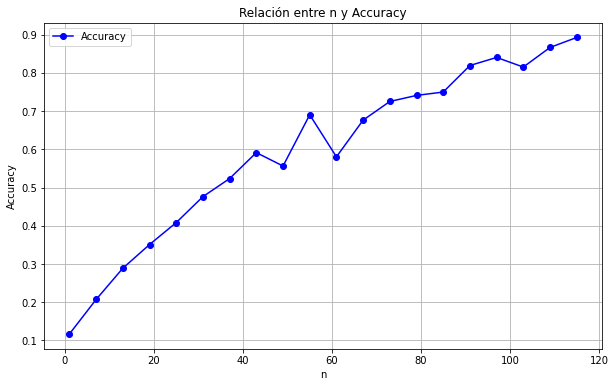

In [82]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(lista_n, lista_accuracy, marker='o', linestyle='-', color='b', label='Accuracy')

# Añadir títulos y etiquetas
plt.title('Relación entre n y Accuracy')
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.legend()

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

Good accuracy, especially for a number of games greater than 80

In [38]:
with open('n_games_data.pkl', 'rb') as file:
    n_games_data = pickle.load(file)

In [40]:
lista_real = n_games_data[115][0]
lista_predicciones = n_games_data[115][1]

print(accuracy_score(lista_real, lista_predicciones))
print(classification_report(lista_real, lista_predicciones))

0.8928571428571429
              precision    recall  f1-score   support

    Alekhine       1.00      1.00      1.00         2
       Anand       0.88      1.00      0.93         7
   Botvinnik       1.00      1.00      1.00         1
  Capablanca       1.00      1.00      1.00         1
     Carlsen       1.00      0.78      0.88         9
        Ding       0.67      0.67      0.67         3
        Euwe       1.00      1.00      1.00         1
     Fischer       1.00      1.00      1.00         1
      Karpov       1.00      0.83      0.91         6
    Kasparov       1.00      1.00      1.00         3
     Kramnik       0.62      0.83      0.71         6
      Lasker       1.00      1.00      1.00         1
   Petrosian       1.00      1.00      1.00         3
     Smyslov       1.00      0.75      0.86         4
     Spassky       1.00      1.00      1.00         3
    Steinitz       1.00      1.00      1.00         1
         Tal       0.80      1.00      0.89         4

    acc

Normalized confusion matrix


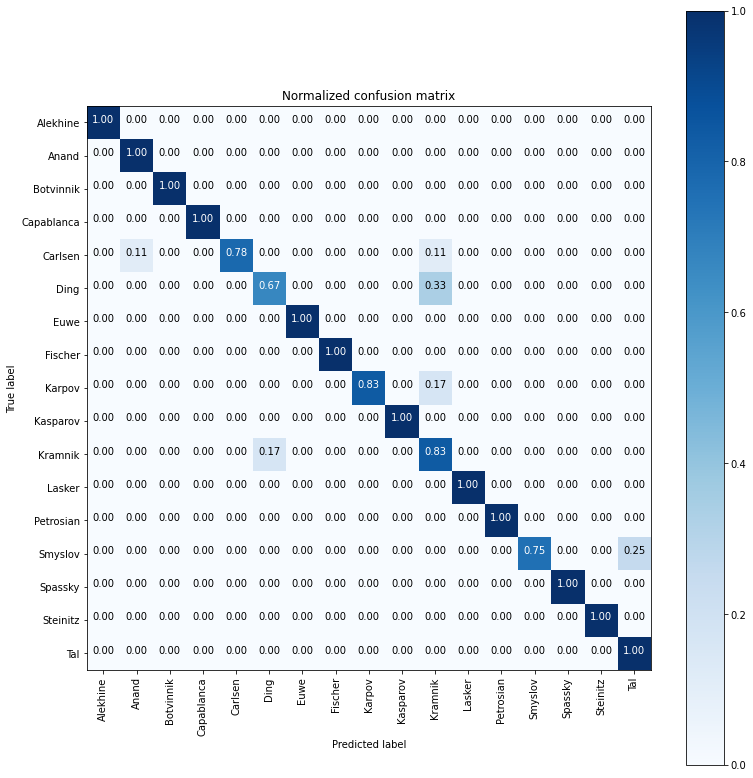

In [45]:
cnf_matrix = confusion_matrix(lista_real, lista_predicciones)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(11, 11))
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True, title='Normalized confusion matrix')

plt.show()

Looking at the results, we can see that the errors may be reasonable, because the model has errors with players from the same era.



### Now we use all the data we have for each player to make a final prediction

In [26]:
from sklearn.metrics import accuracy_score
labels = y.unique()
lista_predicciones = []
for jugador in labels:  
    lista_vectores = []
    for i in range(len(y_test)):
        if y_test.iloc[i] == jugador:
            lista_vectores.append(X_test.iloc[i, :].to_numpy())
    test_jugador = predecir(lista_vectores, modelo, vectores_jugadores)
    print(f"Prediccion para {jugador}: {test_jugador}")
    lista_predicciones.append(test_jugador)
accuracy = accuracy_score(labels, lista_predicciones)

print("Accuracy cuando se usan todos los datos de test:", accuracy)

Prediccion para Alekhine: Alekhine
Prediccion para Anand: Anand
Prediccion para Botvinnik: Botvinnik
Prediccion para Capablanca: Capablanca
Prediccion para Carlsen: Carlsen
Prediccion para Ding: Ding
Prediccion para Euwe: Euwe
Prediccion para Fischer: Fischer
Prediccion para Karpov: Karpov
Prediccion para Kasparov: Kasparov
Prediccion para Kramnik: Kramnik
Prediccion para Lasker: Lasker
Prediccion para Petrosian: Petrosian
Prediccion para Smyslov: Smyslov
Prediccion para Spassky: Spassky
Prediccion para Steinitz: Steinitz
Prediccion para Tal: Tal
Accuracy cuando se usan todos los datos de test: 1.0


100% accuracy :D

#### Now we test with the Magnus Carlsen lichess data

In [28]:
vector_usuario = create_pred_vector("pgns\lichess_DrNykterstein_2024-06-25.pgn", "DrNykterstein", modelo)
recomendacion = get_best_match(vector_usuario, vectores_jugadores)
recomendacion

'Carlsen'

Good classification too!

In [32]:
vector_usuario

[0.060955518945634266,
 0.03130148270181219,
 0.032948929159802305,
 0.04612850082372323,
 0.15650741350906094,
 0.13509060955518945,
 0.03459637561779242,
 0.12191103789126853,
 0.03459637561779242,
 0.039538714991762765,
 0.016474464579901153,
 0.10378912685337727,
 0.023064250411861616,
 0.018121911037891267,
 0.029654036243822075,
 0.09390444810543658,
 0.0214168039538715]

In [34]:
list(vectores_jugadores["Carlsen"])

[0.06731813246471227,
 0.04343105320304017,
 0.05754614549402823,
 0.05754614549402823,
 0.09771986970684039,
 0.16720955483170466,
 0.04343105320304017,
 0.10423452768729642,
 0.05428881650380022,
 0.03691639522258415,
 0.02714440825190011,
 0.09446254071661238,
 0.016286644951140065,
 0.02714440825190011,
 0.023887079261672096,
 0.06948968512486428,
 0.011943539630836048]

Very similar vector

### Using the model:

Example of use:

In [36]:
vector_usuario = create_pred_vector("pgns\lichess_B12113114_2024-06-25.pgn", "B12113114", modelo)
recomendacion = get_best_match(vector_usuario, vectores_jugadores)
recomendacion

'Alekhine'

In [37]:
vector_usuario

[0.12790697674418605,
 0.023255813953488372,
 0.007751937984496124,
 0.06589147286821706,
 0.08914728682170543,
 0.06976744186046512,
 0.050387596899224806,
 0.08914728682170543,
 0.011627906976744186,
 0.023255813953488372,
 0.007751937984496124,
 0.12403100775193798,
 0.0,
 0.0,
 0.050387596899224806,
 0.18992248062015504,
 0.06976744186046512]

## To use the model run from here
>

Load the model and vectors

In [ ]:
import pickle

with open('svm_model_chess.pkl', 'rb') as file:
    modelo = pickle.load(file)

with open('vectores_jugadores.pkl', 'rb') as archivo:
    vectores_jugadores = pickle.load(archivo)

Create the functions

In [ ]:
import sentence_transformers
import chess.pgn

def parse_pgn_file(file_path, player):
    
    with open(file_path, 'r', encoding='utf-8') as pgn:
        
        player_games = list()

        while True:

            try:
                game = chess.pgn.read_game(pgn)
            except UnicodeDecodeError:
                print(game)
                
            if game is None:
                break  
            #We asume that name of the player is always in one of the headers
            player_color = "White" if player == game.headers["White"] else "Black"
            player_moves = list()
            node = game

            i = 0
            while not node.is_end():

                move = node.variation(0)
                
                next_node = node.variation(0)

                if player_color == "White":
                    if i % 2 == 0:
                        player_moves.append(node.board().san(next_node.move))
                else:
                    if i % 2 != 0:
                        player_moves.append(node.board().san(next_node.move))

                node = next_node
                i += 1
            
            
            player_games.append(player_moves)

    return player_games



def vectorize_games(games):
    modelo = sentence_transformers.SentenceTransformer("bert-base-nli-mean-tokens")
    games_vectors = list()

    for game in games:
        game_string = " ".join(game)
        modelo.encode(game_string)
        games_vectors.append(modelo.encode(game_string))
    
    return games_vectors

def update_vector(vector, prediction):
    player_dic = {'Alekhine': 0,
              'Anand': 1,
              'Botvinnik': 2,
              'Capablanca': 3,
              'Carlsen': 4,
              'Ding': 5,
              'Euwe': 6,
              'Fischer': 7,
              'Karpov': 8,
              'Kasparov': 9,
              'Kramnik': 10,
              'Lasker': 11,
              'Petrosian': 12,
              'Smyslov': 13,
              'Spassky': 14,
              'Steinitz': 15,
              'Tal': 16}
    vector[player_dic[prediction]] += 1
    return vector

def normalize_vector(vector):
    total = sum(vector)
    return [x / total for x in vector]

def create_pred_vector(path, player, modelo):

    games = parse_pgn_file(path, player)

    vector_list = vectorize_games(games)

    pred_vector = [0] * 17

    for vector in vector_list:
        prediction = modelo.predict(vector.reshape(1, -1))[0]
        pred_vector = update_vector(pred_vector, prediction)

    return normalize_vector(pred_vector)


def compare_vectors(v1, v2):
    #return sum([abs(x - y) for x, y in zip(v1, v2)])  (Manhattan distance)
    #return (sum([(x - y)**2 for x, y in zip(v1, v2)]))**0.5 (Euclidean distance)
    v1 = np.array(v1)
    v2 = np.array(v2)
    dot_product = np.dot(v1, v2)
    norm_vec1 = np.linalg.norm(v1)
    norm_vec2 = np.linalg.norm(v2)
    return -(dot_product / (norm_vec1 * norm_vec2)) # (-cosine similarity) (this gave the best results)

def get_best_match(pred_vector, players_dict):
    best_match = None
    best_score = float('inf')

    for player, idx in players_dict.items():
        score = compare_vectors(pred_vector, idx)
        if score < best_score:
            best_score = score
            best_match = player

    return best_match

Your results

In [ ]:
your_vector = create_pred_vector("path_to_your_pgn_file", "your_username", modelo)
similar_player = get_best_match(your_vector, vectores_jugadores)
similar_player

In [ ]:
your_vector